In [302]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt


In [304]:
df=pd.read_csv('ADANIPORTS.CSV')

In [306]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


In [308]:
df.shape

(3322, 15)

In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3322 non-null   object 
 1   Symbol              3322 non-null   object 
 2   Series              3322 non-null   object 
 3   Prev Close          3322 non-null   float64
 4   Open                3322 non-null   float64
 5   High                3322 non-null   float64
 6   Low                 3322 non-null   float64
 7   Last                3322 non-null   float64
 8   Close               3322 non-null   float64
 9   VWAP                3322 non-null   float64
 10  Volume              3322 non-null   int64  
 11  Turnover            3322 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  3322 non-null   int64  
 14  %Deliverble         3322 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 389.4

In [312]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3.322000e+03,3.322000e+03,2.456000e+03,3.322000e+03,3322.000000
mean,344.114314,344.763019,351.608007,337.531969,344.239539,344.201626,344.853182,2.954564e+06,1.070144e+14,4.492259e+04,1.207441e+06,0.445899
std,192.936882,193.619992,198.617808,188.676614,193.187813,193.045886,193.841305,4.104227e+06,2.625564e+14,5.023124e+04,1.398640e+06,0.160496
min,108.000000,108.000000,110.450000,105.650000,108.000000,108.000000,108.340000,1.236600e+04,2.415857e+11,3.660000e+02,5.383000e+03,0.067000
25%,164.312500,164.850000,168.000000,161.600000,164.075000,164.312500,164.855000,7.493682e+05,1.817650e+13,2.083200e+04,3.212005e+05,0.332900
50%,324.700000,325.750000,331.275000,319.850000,325.000000,324.700000,325.765000,2.007292e+06,5.836041e+13,3.588150e+04,8.132775e+05,0.445650
75%,400.912500,401.000000,407.187500,395.000000,400.912500,400.912500,400.607500,3.636883e+06,1.158526e+14,5.336875e+04,1.605528e+06,0.555850
max,1307.450000,1310.250000,1324.000000,1270.000000,1308.000000,1307.450000,1302.150000,9.771788e+07,8.160988e+15,1.205984e+06,2.241652e+07,0.979800


In [314]:
df.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [316]:
df.isnull().sum()

Date                    0
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                866
Deliverable Volume      0
%Deliverble             0
dtype: int64

In [318]:
df[['Prev Close', 'Open', 'High', 'Low', 'Close']].skew()

Prev Close    1.275723
Open          1.283868
High          1.309294
Low           1.255761
Close         1.274576
dtype: float64

<Axes: >

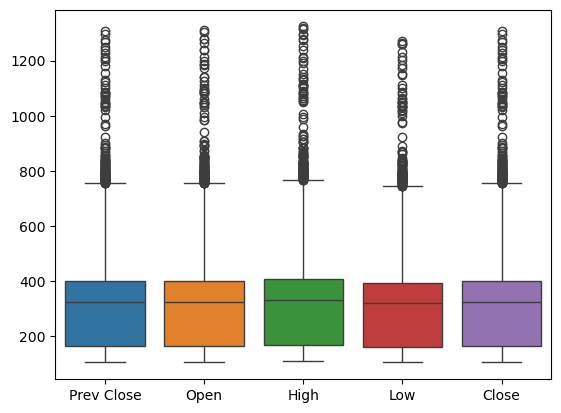

In [320]:
sns.boxplot(data=df[['Prev Close', 'Open', 'High', 'Low', 'Close']])


8.983057814905829

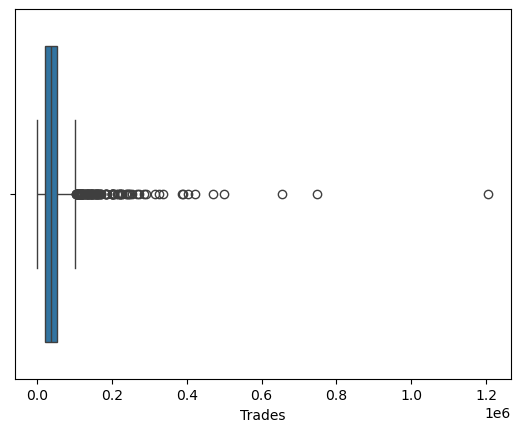

In [322]:
sns.boxplot(x=df['Trades'])
df['Trades'].skew()

In [324]:
from sklearn.impute import SimpleImputer

In [326]:
imputer=SimpleImputer(strategy='median')
imputed_data=imputer.fit_transform(df[['Trades']])

In [328]:
df['Trades']=df['Trades'].fillna(df['Trades'].median())

In [330]:
df.isnull().sum()

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

1.2732594550649172

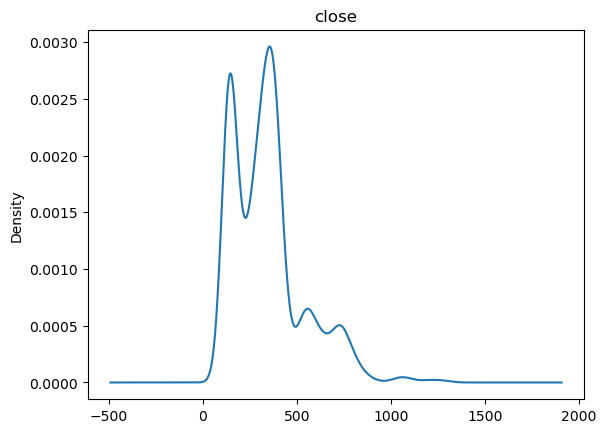

In [472]:
plt.title('close')
df['Close'].plot(kind='kde')
df['Close'].skew()



1.2852657449946583

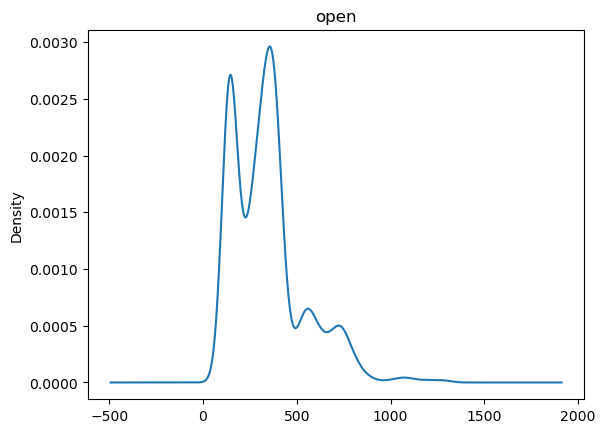

In [474]:
plt.title('open')
df['Open'].plot(kind='kde')
df['Open'].skew()


Text(0.5, 1.0, 'High')

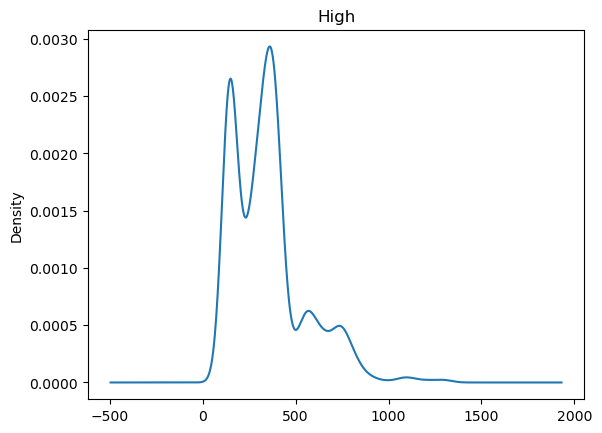

In [476]:
df['High'].plot(kind='kde')
df['High'].skew()
plt.title('High')

Text(0.5, 1.0, 'Low')

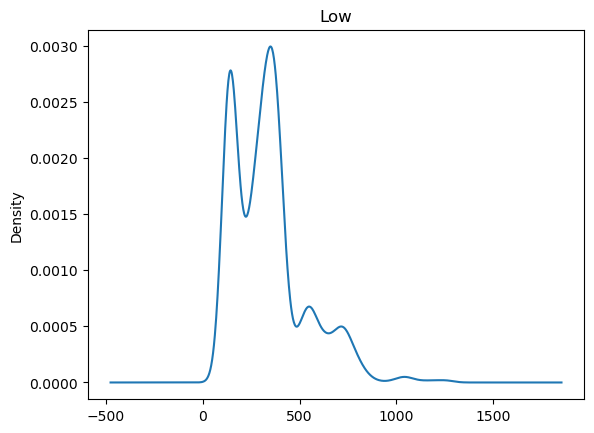

In [478]:
df['Low'].plot(kind='kde')
df['Low'].skew()
plt.title('Low')

Text(0.5, 1.0, 'Last')

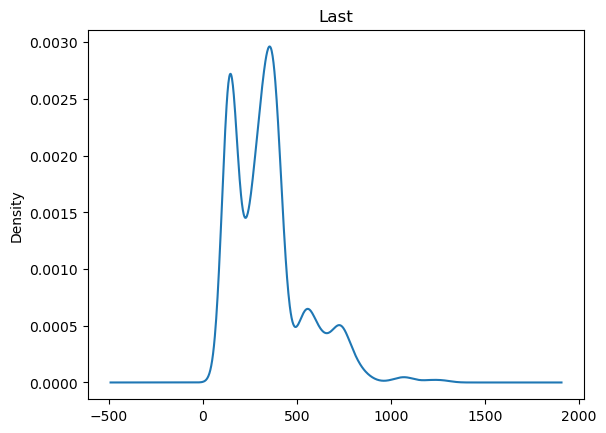

In [482]:
df['Last'].plot(kind='kde')
df['Last'].skew()
plt.title('Last')

Text(0.5, 1.0, 'Prev Close')

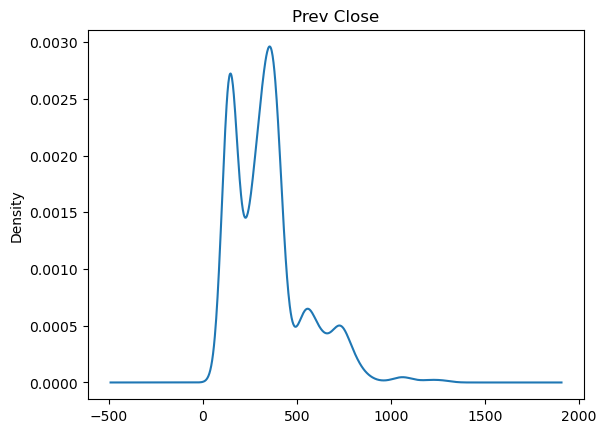

In [480]:
df['Prev Close'].plot(kind='kde')
df['Prev Close'].skew()
plt.title('Prev Close')

In [382]:
le=LabelEncoder()
df['Symbol']=le.fit_transform(df['Symbol'])
df['Symbol'].unique()
df['Symbol'].value_counts()

Symbol
0    2299
1    1023
Name: count, dtype: int64

In [384]:
df.groupby('Symbol')[['Open', 'High', 'Low', 'Close', 'Prev Close']].describe()


Open                                                                 \
         count        mean         std    min      25%    50%    75%      max   
Symbol                                                                          
0       2299.0  294.420705  119.963699  108.0  190.025  310.8  371.0   857.00   
1       1023.0  457.897898  266.359890  110.0  156.625  513.0  650.0  1310.25   

          High              ...    Close          Prev Close              \
         count        mean  ...      75%      max      count        mean   
Symbol                      ...                                            
0       2299.0  299.126599  ...  371.075   835.55     2299.0  293.853154   
1       1023.0  469.550098  ...  649.075  1307.45     1023.0  457.066813   

                                                              
               std    min      25%     50%      75%      max  
Symbol                                                        
0       119.557257  108.0  189.125  310.60  370.950   835.55  
1       265.269787  114.7  156.975  510.95  649.075  1307.45  

[2 rows x 40 columns]

<Axes: xlabel='Close', ylabel='Low'>

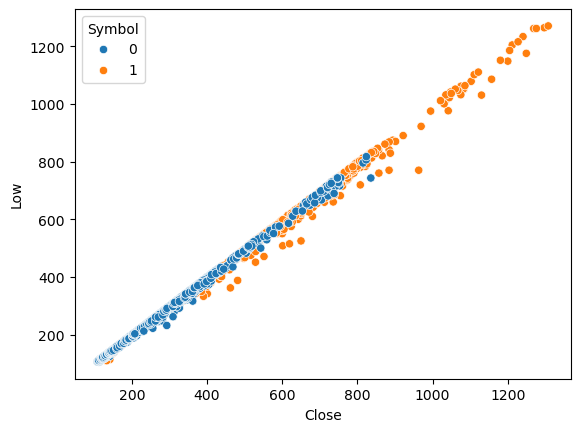

In [385]:
sns.scatterplot(data=df,x='Close', y='Low',hue='Symbol')

<Axes: xlabel='Close', ylabel='High'>

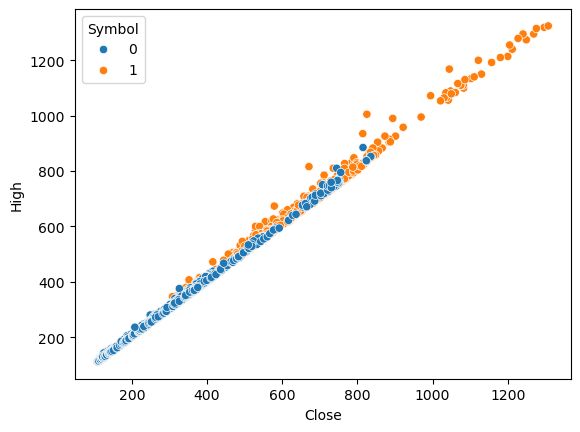

In [490]:
sns.scatterplot(data=df,x='Close', y='High',hue='Symbol')

<Axes: xlabel='Close', ylabel='Open'>

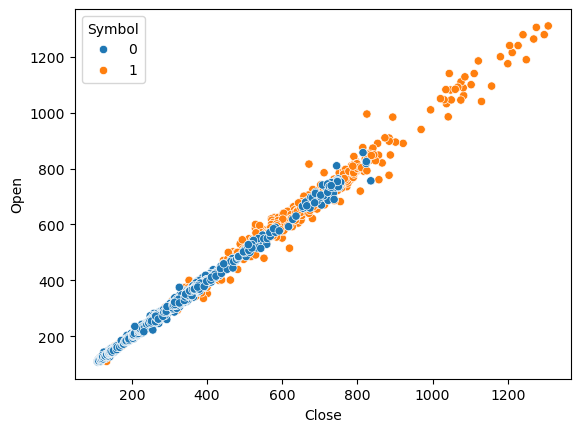

In [488]:
sns.scatterplot(data=df,x='Close', y='Open',hue='Symbol')

<Axes: xlabel='Close', ylabel='Prev Close'>

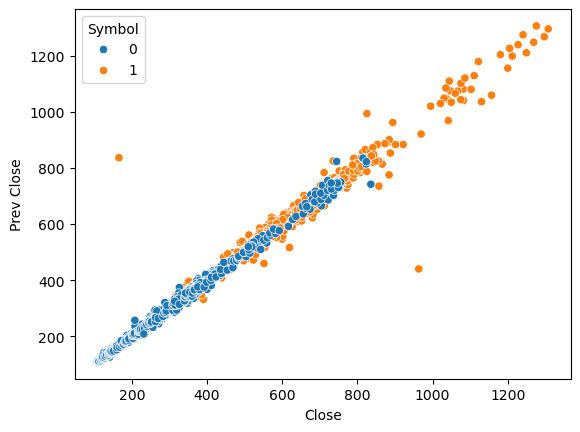

In [390]:
sns.scatterplot(data=df,x='Close', y='Prev Close',hue='Symbol')

<Axes: xlabel='Close', ylabel='VWAP'>

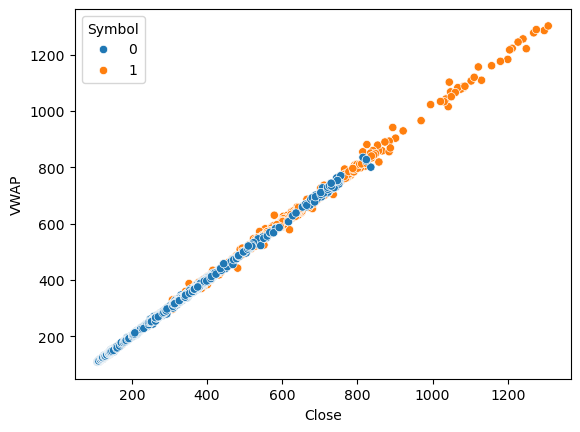

In [492]:
sns.scatterplot(data=df,x='Close', y='VWAP',hue='Symbol')

<Axes: xlabel='Close', ylabel='Last'>

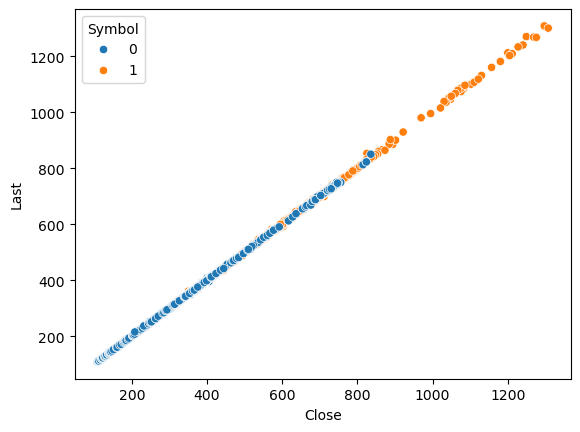

In [494]:
sns.scatterplot(data=df,x='Close', y='Last',hue='Symbol')

<Axes: >

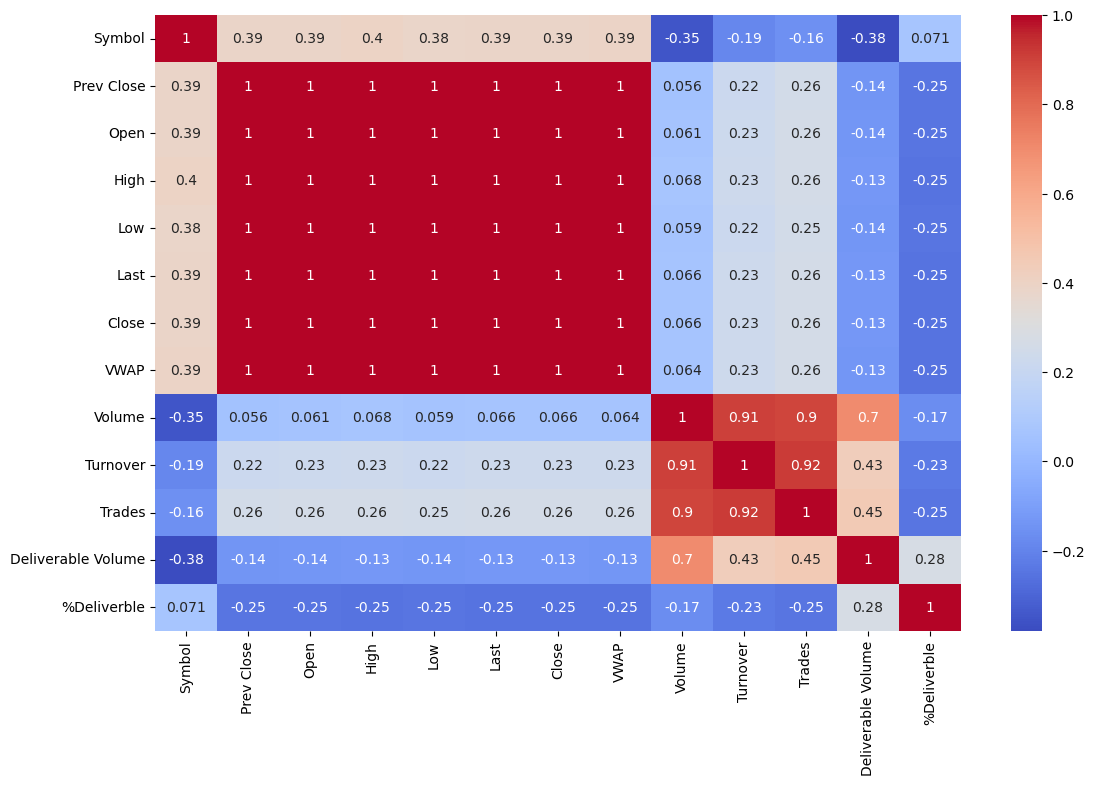

In [392]:
plt.figure(figsize=(13,8))
sns.heatmap(df[[ 'Symbol','Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble']].corr(), annot=True, cmap='coolwarm')

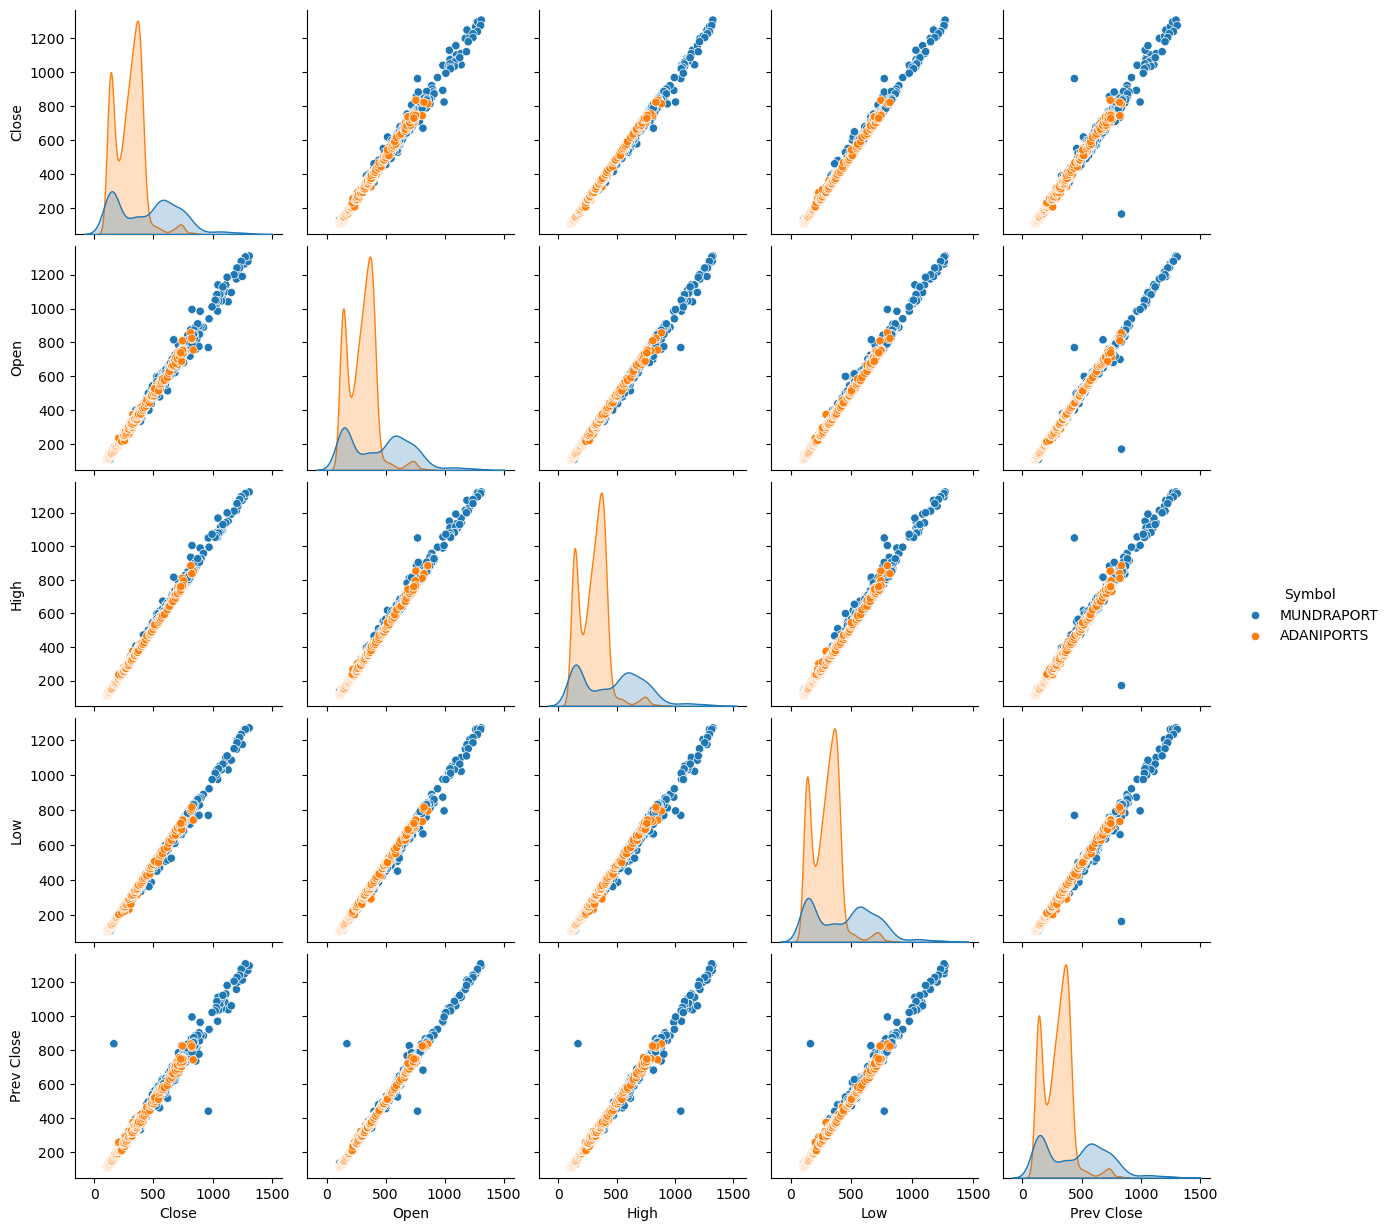

In [362]:
sns.pairplot(df, vars=['Close', 'Open', 'High', 'Low', 'Prev Close'],hue='Symbol')

<Axes: xlabel='Open', ylabel='Close'>

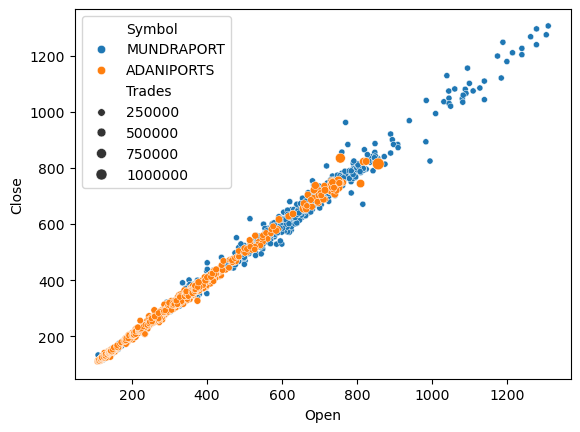

In [372]:
sns.scatterplot(data=df, x='Open', y='Close',size='Trades', hue='Symbol')

FEATURE EMGINEEERING 

In [394]:
df['Next_Close']=df['Close'].shift(1)

In [418]:
df = df.iloc[1:].reset_index(drop=True)

In [420]:
df.isnull().sum()

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
Next_Close            0
dtype: int64

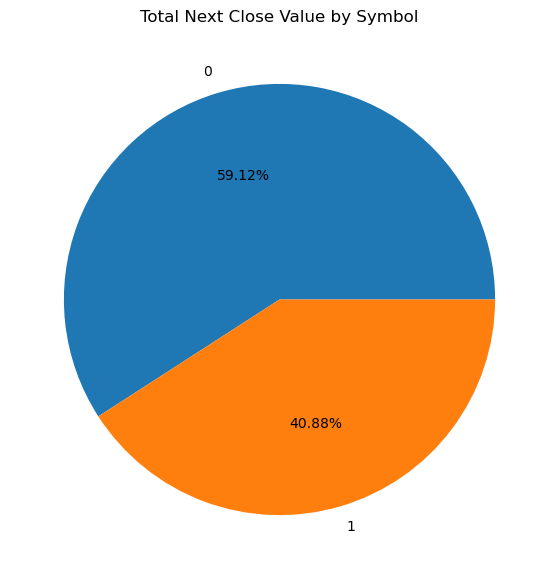

In [432]:
symbol_sum = df.groupby('Symbol')['Next_Close'].sum()

plt.figure(figsize=(7, 7))
plt.pie(symbol_sum, labels=symbol_sum.index, autopct='%1.2f%%')
plt.title('Total Next Close Value by Symbol')
plt.show()

<Axes: xlabel='Symbol', ylabel='Next_Close'>

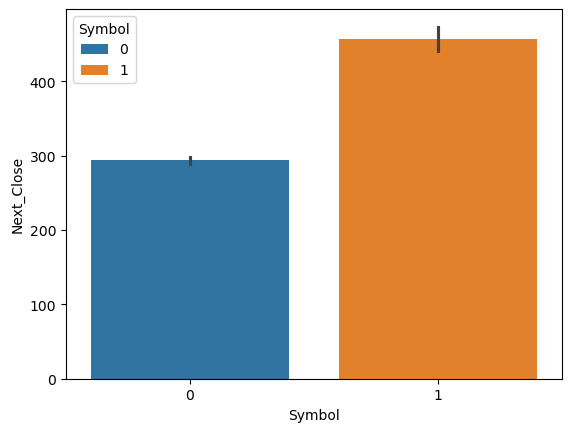

In [506]:
sns.barplot(data=df, x='Symbol', y='Next_Close',hue='Symbol')

In [ ]:
removing features

<Axes: xlabel='Next_Close', ylabel='Series'>

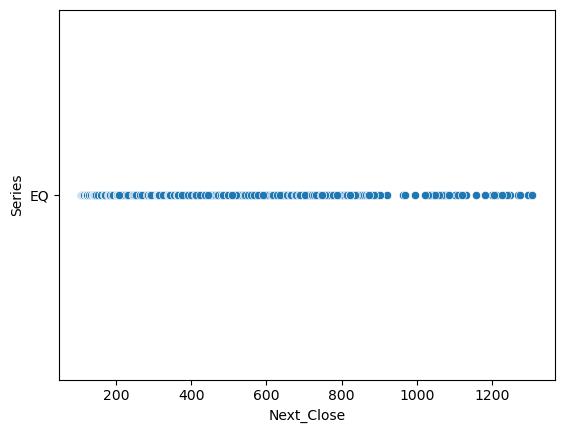

In [510]:
sns.scatterplot(data=df,x='Next_Close',y='Series')

<Axes: xlabel='Next_Close', ylabel='Last'>

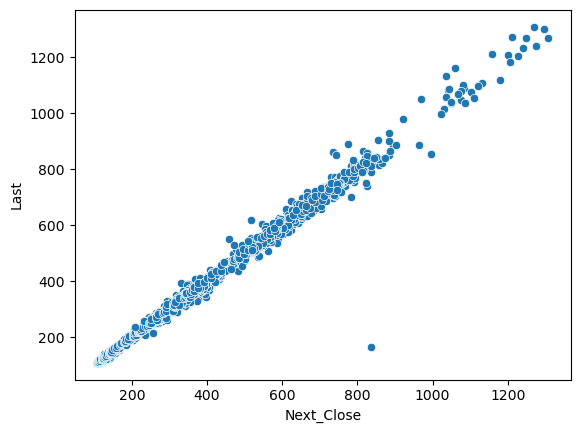

In [512]:
sns.scatterplot(data=df,x='Next_Close',y='Last')

<Axes: xlabel='Next_Close', ylabel='Close'>

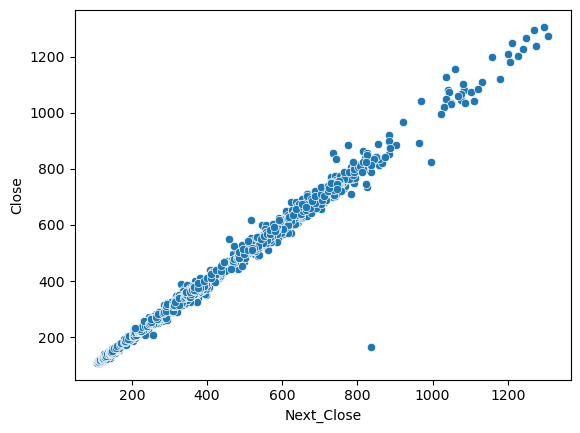

In [514]:
sns.scatterplot(data=df,x='Next_Close',y='Close')

<Axes: xlabel='Next_Close', ylabel='VWAP'>

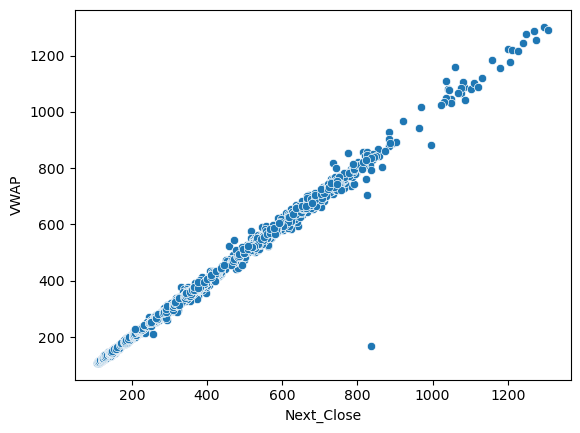

In [516]:
sns.scatterplot(data=df,x='Next_Close',y='VWAP')

<Axes: xlabel='Next_Close', ylabel='Deliverable Volume'>

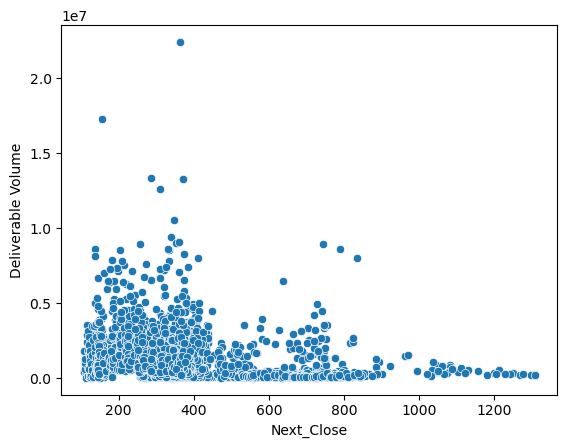

In [518]:
sns.scatterplot(data=df,x='Next_Close',y='Deliverable Volume')

<Axes: xlabel='Next_Close', ylabel='%Deliverble'>

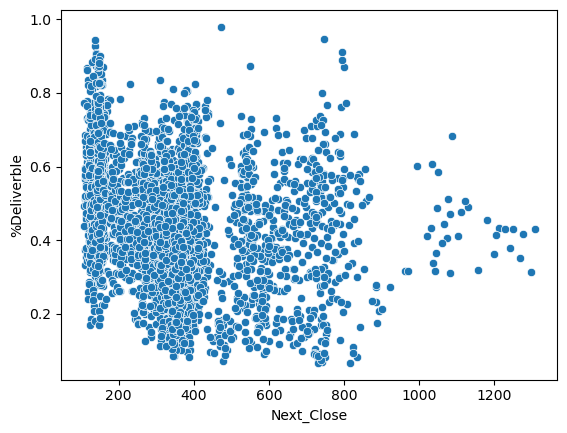

In [522]:
sns.scatterplot(data=df,x='Next_Close',y='%Deliverble')

<Axes: xlabel='Next_Close', ylabel='Trades'>

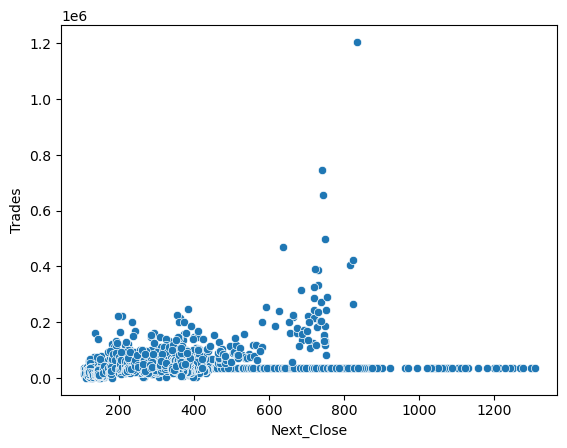

In [524]:
sns.scatterplot(data=df,x='Next_Close',y='Trades')

<Axes: xlabel='Next_Close', ylabel='Volume'>

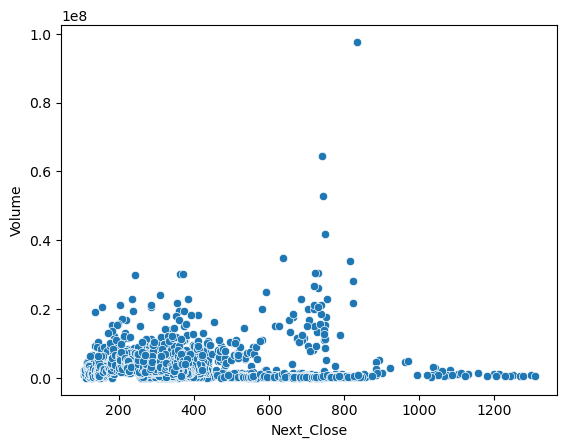

In [528]:
sns.scatterplot(data=df,x='Next_Close',y='Volume')

<Axes: xlabel='Next_Close', ylabel='Turnover'>

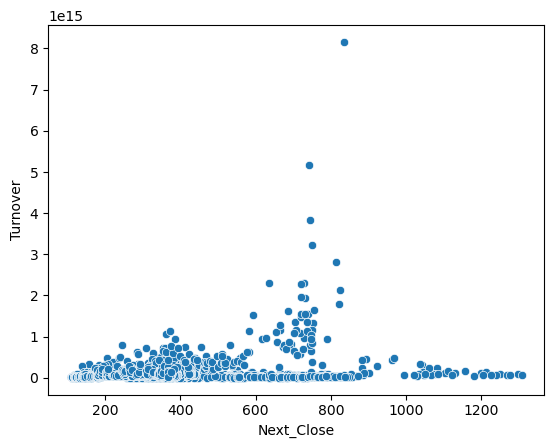

In [530]:
sns.scatterplot(data=df,x='Next_Close',y='Turnover')

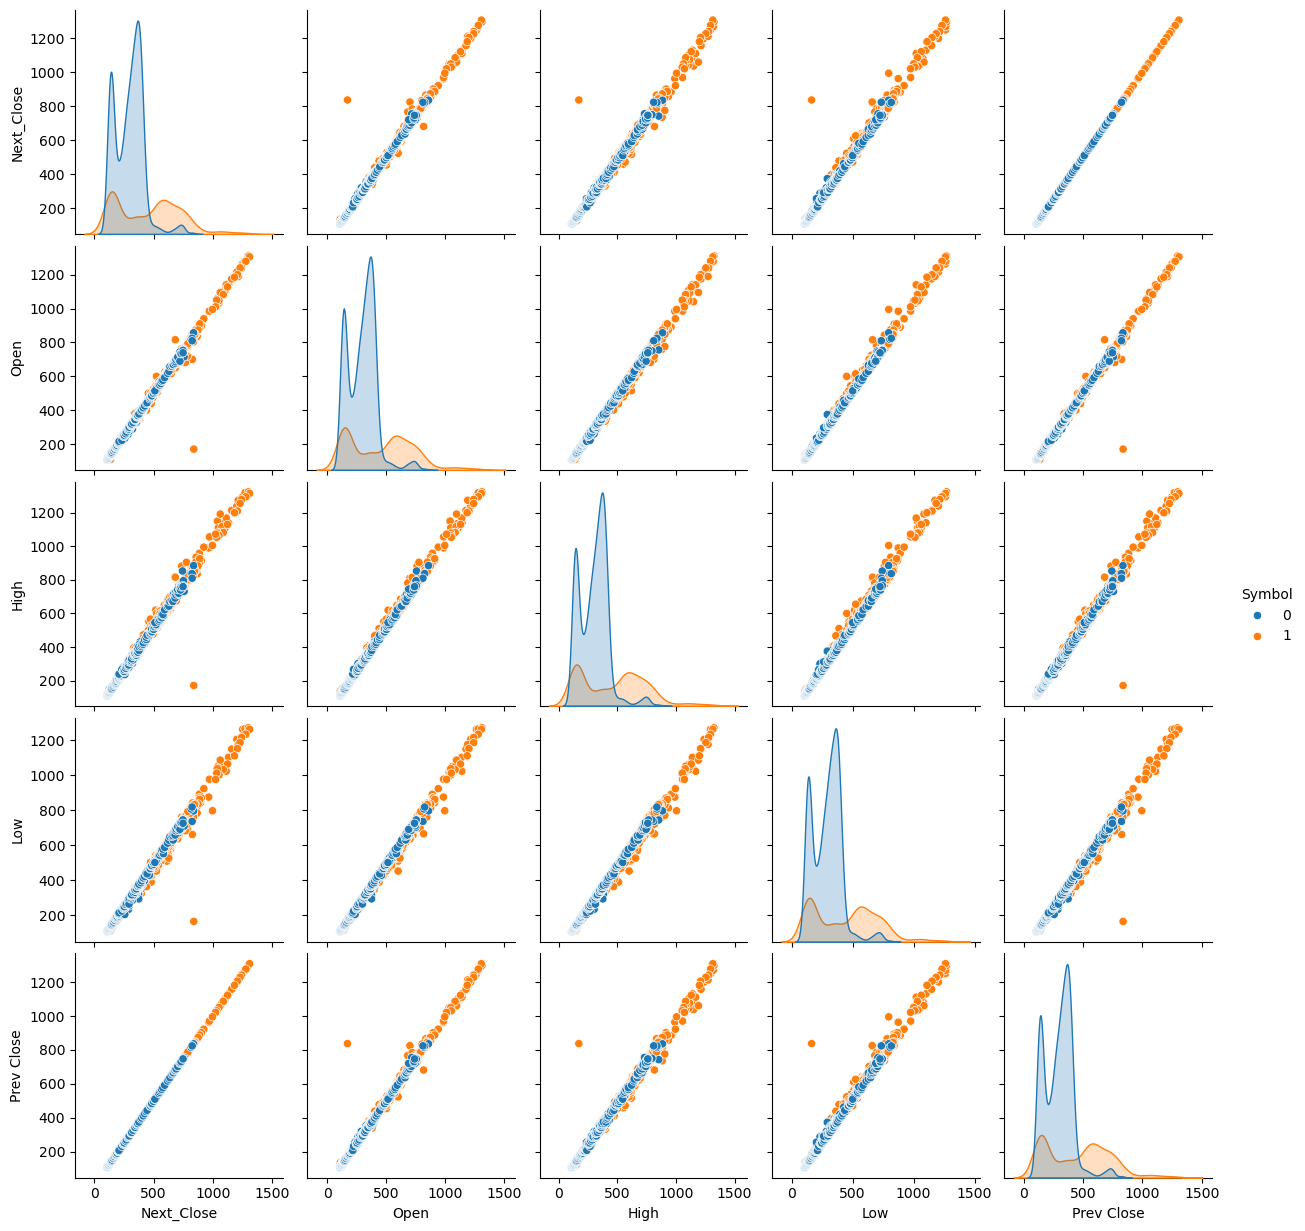

In [569]:
sns.pairplot(df, vars=['Next_Close', 'Open', 'High', 'Low', 'Prev Close'],hue='Symbol')

In [532]:
df = df.drop(['Volume', 'Turnover', 'Trades', 'Series', 'Last', 'Close', 
              'VWAP', 'Deliverable Volume', '%Deliverble'], axis=1)

In [534]:
df

,Date,Symbol,Prev Close,Open,High,Low,Next_Close
0,2007-11-28,1,962.90,984.00,990.00,874.00,962.90
1,2007-11-29,1,893.90,909.00,914.75,841.00,893.90
2,2007-11-30,1,884.20,890.00,958.00,890.00,884.20
3,2007-12-03,1,921.55,939.75,995.00,922.00,921.55
4,2007-12-04,1,969.30,985.00,1056.00,976.00,969.30
...,...,...,...,...,...,...,...
3316,2021-04-26,0,725.35,733.00,739.65,728.90,725.35
3317,2021-04-27,0,730.75,735.00,757.50,727.35,730.75
3318,2021-04-28,0,749.15,755.00,760.00,741.10,749.15
3319,2021-04-29,0,746.25,753.20,765.85,743.40,746.25


In [561]:
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year


In [575]:
features =[ 'Symbol', 'Open', 'High', 'Low', 'Prev Close','Day','Month','Year']
X = df[features]

In [576]:
y=df['Next_Close']

In [1011]:
df.columns


Index(['Date', 'Symbol', 'Prev Close', 'Open', 'High', 'Low', 'Next_Close',
       'Day', 'Month', 'Year'],
      dtype='object')

In [1163]:
from sklearn.feature_selection import f_regression

In [1225]:
F_values, p_values = f_regression(X, y)

In [1350]:
mask = selector.get_support()


In [1352]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [1353]:
x_train


,Symbol,Open,High,Low,Prev Close,Day,Month,Year
3007,0,383.70,386.25,379.80,384.75,27,1,2020
2439,0,388.40,392.30,387.25,385.90,6,10,2017
2576,0,388.65,398.50,388.10,391.90,26,4,2018
2858,0,423.50,424.85,400.70,421.40,19,6,2019
456,1,541.65,547.10,534.20,538.10,12,10,2009
...,...,...,...,...,...,...,...,...
1095,0,126.55,127.50,124.45,126.05,3,5,2012
1130,0,117.25,118.15,115.80,117.45,21,6,2012
1294,0,146.15,151.70,144.60,148.40,15,2,2013
860,1,151.00,155.20,151.00,151.80,25,5,2011


In [1355]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train) 
x_test_scaled = scaler.transform(x_test)   

In [1358]:
from sklearn.linear_model import Lasso,Ridge,LinearRegression,ElasticNet
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [1360]:
model=Lasso(alpha=1)
model.fit(x_train,y_train)


C:\Users\T70\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.386e+03, tolerance: 8.420e+03
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=1)

In [1361]:
y_pred = model.predict(x_test)

In [1364]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)

Mean Squared Error (MSE): 73.58879948269221
Mean Absolute Error (MAE): 1.5259945564347805
R² Score: 0.9981342910170564


In [1366]:
F_values, p_values = f_regression(X, y)

In [1368]:
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [1370]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)


Mean Squared Error (MSE): 2.3791910708076023e-24
Mean Absolute Error (MAE): 1.3253581894065627e-12
R² Score: 1.0


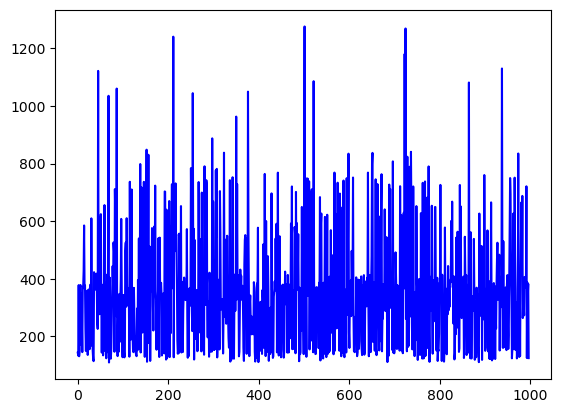

In [1372]:
plt.plot(y_test.values, label='Actual', color='blue')

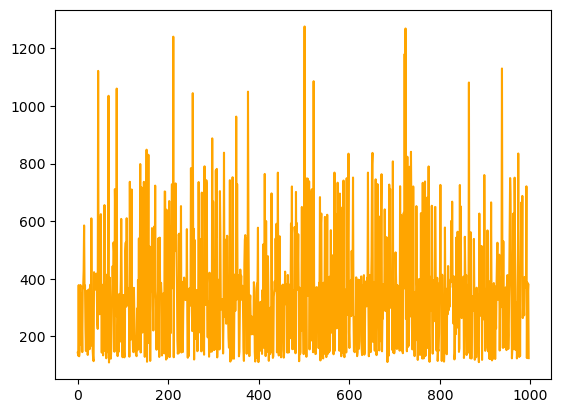

In [1373]:

plt.plot(y_pred, label='Predicted', color='orange')

In [1374]:
model=Ridge()
model.fit(x_train,y_train)

Ridge()

In [1375]:
y_pred=model.predict(x_test)

In [1377]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)

Mean Squared Error (MSE): 5.5707164663334037e-08
Mean Absolute Error (MAE): 4.0058634525993836e-05
R² Score: 0.9999999999985877


In [1382]:
from sklearn.ensemble import RandomForestRegressor

In [1384]:
model=RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [1385]:
y_pred=model.predict(x_test)

In [1386]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)

Mean Squared Error (MSE): 3.5662169804413737
Mean Absolute Error (MAE): 0.4373550651955768
R² Score: 0.9999095851121053


In [1390]:
from xgboost import XGBRegressor
model=XGBRegressor()
model.fit(x_train,y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [1392]:
y_pred=model.predict(x_test)

In [1394]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)

Mean Squared Error (MSE): 51.27992986666174
Mean Absolute Error (MAE): 1.7066815604895733
R² Score: 0.9986998914716709


In [1396]:
model=ElasticNet()
model.fit(x_train,y_train)

C:\Users\T70\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.606e+03, tolerance: 8.420e+03
  model = cd_fast.enet_coordinate_descent(


ElasticNet()

In [1398]:
y_pred=model.predict(x_test)

In [1400]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)

Mean Squared Error (MSE): 74.15335449694392
Mean Absolute Error (MAE): 1.537418175294918
R² Score: 0.9981199777605709


In [1402]:
from sklearn.svm import SVR

In [1404]:
model=SVR()
model.fit(x_train,y_train)

SVR()

In [1405]:
y_pred=model.predict(x_test)

In [1406]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)

Mean Squared Error (MSE): 7132.996546388567
Mean Absolute Error (MAE): 50.708966150003725
R² Score: 0.8191559608873259


In [1410]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)

Mean Squared Error (MSE): 20.67361835506519
Mean Absolute Error (MAE): 0.8002507522567717
R² Score: 0.999475858340588


In [1412]:
from sklearn.model_selection import KFold,cross_val_score

In [1414]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [1416]:
lr_model = Lasso()
lr_scores = cross_val_score(lr_model, X, y, cv=kf, scoring='r2')
scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

C:\Users\T70\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.120e+04, tolerance: 9.734e+03
  model = cd_fast.enet_coordinate_descent(


TypeError: 'list' object is not callable

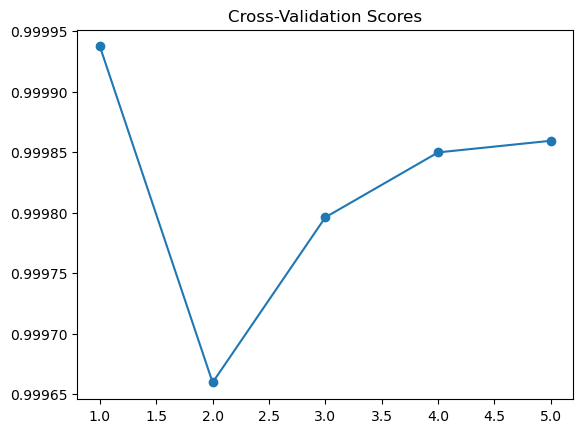

In [1418]:
plt.plot(range(1, len(scores) + 1), scores, marker='o')
plt.title("Cross-Validation Scores")
plt.xlabel("Fold")
plt.ylabel("R² Score")

plt.grid(True)
plt.show()

C:\Users\T70\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
